In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall xgboost -y
!pip install -U xgboost

!pip uninstall scikit-learn -y
!pip install -U scikit-learn



Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 173.5 MB 13 kB/s 
Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
     |████████████████████████████████| 23.2 MB 76.0 MB/s 


In [3]:
!pip uninstall numpy -y
!pip install -U numpy

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.7 MB 7.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import warnings
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
import joblib
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import os
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Define directories for use

In [5]:
basedir = '/content/drive/MyDrive/recidivism/'

processed_datadir = os.path.join(basedir,'data_remote')
modelsdir = os.path.join(basedir,'models')
model_verifydir = os.path.join(basedir,'model_verify')
model_xgbdir = os.path.join(basedir, 'model_xgb')

## Import datasets

In [6]:
xtrain_path = os.path.join(processed_datadir, "Xtrain.csv")
xtest_path = os.path.join(processed_datadir, "Xtest.csv")
ytrain_path = os.path.join(processed_datadir, "ytrain.csv")
ytest_path = os.path.join(processed_datadir, "ytest.csv")

X_train = pd.read_csv(xtrain_path)
X_test = pd.read_csv(xtest_path)
y_train = pd.read_csv(ytrain_path, squeeze=True)
y_test = pd.read_csv(ytest_path, squeeze=True)

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (19920, 42)
X_test: (4980, 42)
y_train: (19920,)
y_test: (4980,)


## Define method to calculate scores for models

In [7]:
def calc_scores(model,X_test,y_test,estimator_name):
    proba = model.predict_proba(X_test)
    preds = model.predict(X_test)
    pos_proba = proba[:,1]
    bs = brier_score_loss(y_test, pos_proba)
    f1 = f1_score(y_test,preds)
    rs = recall_score(y_test,preds)
    ps = precision_score(y_test,preds)
    acc = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, pos_proba)
    fpr, tpr, thresholds = roc_curve(y_test,preds)
    # display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc,estimator_name=estimator_name)
    display = RocCurveDisplay.from_predictions(y_test, pos_proba,name=estimator_name, ax=ax)
    scores = [estimator_name, bs, f1, rs, ps, roc]
    return scores, display

colnames = ['Model', 'Brier Score', 'F1 Score', 'Recall', 'Precision', 'ROC_AUC']

## Import saved models for evaluation

In [8]:
model_dt_auc = joblib.load(os.path.join(modelsdir,'model_dt_auc.pkl'))
model_dt_auc_best = joblib.load(os.path.join(modelsdir,'model_dt_auc_best.pkl'))
# model_dt_auc_sel = joblib.load(os.path.join(modelsdir,'model_dt_auc_sel.pkl'))
# model_dt_auc_sel_best = joblib.load(os.path.join(modelsdir,'model_dt_auc_sel_best.pkl'))
model_dt_bs = joblib.load(os.path.join(modelsdir,'model_dt_bs.pkl'))
model_dt_bs_best = joblib.load(os.path.join(modelsdir,'model_dt_bs_best.pkl'))
# model_dt_bs_sel = joblib.load(os.path.join(modelsdir,'model_dt_bs_sel.pkl'))
# model_dt_bs_sel_best = joblib.load(os.path.join(modelsdir,'model_dt_bs_sel_best.pkl'))
model_knn_auc = joblib.load(os.path.join(modelsdir,'model_knn_auc.pkl'))
model_knn_auc_best = joblib.load(os.path.join(modelsdir,'model_knn_auc_best.pkl'))
# model_knn_auc_sel = joblib.load(os.path.join(modelsdir,'model_knn_auc_sel.pkl'))
# model_knn_auc_sel_best = joblib.load(os.path.join(modelsdir,'model_knn_auc_sel_best.pkl'))
model_knn_bs = joblib.load(os.path.join(modelsdir,'model_knn_bs.pkl'))
model_knn_bs_best = joblib.load(os.path.join(modelsdir,'model_knn_bs_best.pkl'))
# model_knn_bs_sel = joblib.load(os.path.join(modelsdir,'model_knn_bs_sel.pkl'))
# model_knn_bs_sel_best = joblib.load(os.path.join(modelsdir,'model_knn_bs_sel_best.pkl'))
model_lr_auc = joblib.load(os.path.join(modelsdir,'model_lr_auc.pkl'))
model_lr_auc_best = joblib.load(os.path.join(modelsdir,'model_lr_auc_best.pkl'))
# model_lr_auc_sel = joblib.load(os.path.join(modelsdir,'model_lr_auc_sel.pkl'))
# model_lr_auc_sel_best = joblib.load(os.path.join(modelsdir,'model_lr_auc_sel_best.pkl'))
model_lr_bs = joblib.load(os.path.join(modelsdir,'model_lr_bs.pkl'))
model_lr_bs_best = joblib.load(os.path.join(modelsdir,'model_lr_bs_best.pkl'))
# model_lr_bs_sel = joblib.load(os.path.join(modelsdir,'model_lr_bs_sel.pkl'))
# model_lr_bs_sel_best = joblib.load(os.path.join(modelsdir,'model_lr_bs_sel_best.pkl'))
model_rf_auc = joblib.load(os.path.join(modelsdir,'model_rf_auc.pkl'))
model_rf_auc_best = joblib.load(os.path.join(modelsdir,'model_rf_auc_best.pkl'))
# model_rf_auc_sel = joblib.load(os.path.join(modelsdir,'model_rf_auc_sel.pkl'))
# model_rf_auc_sel_best = joblib.load(os.path.join(modelsdir,'model_rf_auc_sel_best.pkl'))
model_rf_bs = joblib.load(os.path.join(modelsdir,'model_rf_bs.pkl'))
model_rf_bs_best = joblib.load(os.path.join(modelsdir,'model_rf_bs_best.pkl'))
# model_rf_bs_sel = joblib.load(os.path.join(modelsdir,'model_rf_bs_sel.pkl'))
# model_rf_bs_sel_best = joblib.load(os.path.join(modelsdir,'model_rf_bs_sel_best.pkl'))
model_sgd_auc = joblib.load(os.path.join(modelsdir,'model_sgd_auc.pkl'))
model_sgd_auc_best = joblib.load(os.path.join(modelsdir,'model_sgd_auc_best.pkl'))
# model_sgd_auc_sel = joblib.load(os.path.join(modelsdir,'model_sgd_auc_sel'))
# model_sgd_auc_sel_best = joblib.load(os.path.join(modelsdir,'model_sgd_auc_sel_best'))
model_sgd_bs = joblib.load(os.path.join(modelsdir,'model_sgd_bs.pkl'))
model_sgd_bs_best = joblib.load(os.path.join(modelsdir,'model_sgd_bs_best.pkl'))
# model_sgd_bs_sel = joblib.load(os.path.join(modelsdir,'model_sgd_bs_sel'))
# model_sgd_bs_sel_best = joblib.load(os.path.join(modelsdir,'model_sgd_bs_sel_best'))
model_xgb_auc = joblib.load(os.path.join(modelsdir,'model_xgb_auc.pkl'))
model_xgb_auc_best = joblib.load(os.path.join(modelsdir,'model_xgb_auc_best.pkl'))
# model_xgb_auc_sel = joblib.load(os.path.join(modelsdir,'model_xgb_auc_sel.pkl'))
# model_xgb_auc_sel_best = joblib.load(os.path.join(modelsdir,'model_xgb_auc_sel_best.pkl'))
model_xgb_bs = joblib.load(os.path.join(modelsdir,'model_xgb_bs.pkl'))
model_xgb_bs_best = joblib.load(os.path.join(modelsdir,'model_xgb_bs_best.pkl'))
# model_xgb_bs_sel = joblib.load(os.path.join(modelsdir,'model_xgb_bs_sel.pkl'))
# model_xgb_bs_sel_best = joblib.load(os.path.join(modelsdir,'model_xgb_bs_sel_best.pkl'))

# model_knn_auc_oh_best = joblib.load(os.path.join(modelsdir,'model_knn_auc_oh_best.pkl'))
# model_lr_auc_oh_best = joblib.load(os.path.join(modelsdir,'model_lr_auc_oh_best.pkl'))
# model_dt_auc_oh_best = joblib.load(os.path.join(modelsdir,'model_dt_auc_oh_best.pkl'))
# model_sgd_auc_oh_best = joblib.load(os.path.join(modelsdir,'model_sgd_auc_oh_best.pkl'))
# model_xgb_auc_oh_best = joblib.load(os.path.join(modelsdir,'model_xgb_auc_oh_best.pkl'))
# model_rf_auc_oh_best = joblib.load(os.path.join(modelsdir,'model_rf_auc_oh_best.pkl'))

# model_knn_auc_oh = joblib.load(os.path.join(modelsdir,'model_knn_auc_oh.pkl'))
# model_lr_auc_oh = joblib.load(os.path.join(modelsdir,'model_lr_auc_oh.pkl'))
# model_dt_auc_oh = joblib.load(os.path.join(modelsdir,'model_dt_auc_oh.pkl'))
# model_sgd_auc_oh = joblib.load(os.path.join(modelsdir,'model_sgd_auc_oh.pkl'))
# model_xgb_auc_oh = joblib.load(os.path.join(modelsdir,'model_xgb_auc_oh.pkl'))
# model_rf_auc_oh = joblib.load(os.path.join(modelsdir,'model_rf_auc_oh.pkl'))

model_knn_auc_ksel_best = joblib.load(os.path.join(modelsdir,'model_knn_auc_ksel_best.pkl'))
model_lr_auc_ksel_best = joblib.load(os.path.join(modelsdir,'model_lr_auc_ksel_best.pkl'))
model_dt_auc_ksel_best = joblib.load(os.path.join(modelsdir,'model_dt_auc_ksel_best.pkl'))
model_sgd_auc_ksel_best = joblib.load(os.path.join(modelsdir,'model_sgd_auc_ksel_best.pkl'))
model_xgb_auc_ksel_best = joblib.load(os.path.join(modelsdir,'model_xgb_auc_ksel_best.pkl'))
model_rf_auc_ksel_best = joblib.load(os.path.join(modelsdir,'model_rf_auc_ksel_best.pkl'))

model_knn_auc_ksel = joblib.load(os.path.join(modelsdir,'model_knn_auc_ksel.pkl'))
model_lr_auc_ksel = joblib.load(os.path.join(modelsdir,'model_lr_auc_ksel.pkl'))
model_dt_auc_ksel = joblib.load(os.path.join(modelsdir,'model_dt_auc_ksel.pkl'))
model_sgd_auc_ksel = joblib.load(os.path.join(modelsdir,'model_sgd_auc_ksel.pkl'))
model_xgb_auc_ksel = joblib.load(os.path.join(modelsdir,'model_xgb_auc_ksel.pkl'))
model_rf_auc_ksel = joblib.load(os.path.join(modelsdir,'model_rf_auc_ksel.pkl'))



In [9]:
# model_list = ['knn_model',
# 'knn_pca_model',
# 'knn_sel_model',
# 'knn_auc_model',
# 'knn_loss_model',
# 'lr_model',
# 'lr_sel_model',
# 'lr_pca_model',
# 'lr_auc_model',
# 'lr_los_model',
# 'dt_model',
# 'dt_sel_model',
# 'dt_pca_model',
# 'dt_auc_model',
# 'dt_loss_model',
# 'rf_model',
# 'rf_sel_model',
# 'rf_pca_model',
# 'rf_auc_model',
# 'rf_loss_model',
# 'sgd_model',
# 'sgd_sel_model',
# 'sgd_pca_model',
# 'sgd_auc_model',
# 'sgd_loss_model',
# 'xgb_model',
# 'xgb_pca_model',
# 'xgb_sel_model',
# 'xgb_auc_model',
# 'xgb_loss_model'
# ]

# models = [knn_model,
# knn_pca_model,
# knn_sel_model,
# knn_auc_model,
# knn_loss_model,
# lr_model,
# lr_sel_model,
# lr_pca_model,
# lr_auc_model,
# lr_loss_model,
# dt_model,
# dt_sel_model,
# dt_pca_model,
# dt_auc_model,
# dt_loss_model,
# rf_model,
# rf_sel_model,
# rf_pca_model,
# rf_auc_model,
# rf_loss_model,
# sgd_model,
# sgd_sel_model,
# sgd_pca_model,
# sgd_auc_model,
# sgd_loss_model,
# xgb_model,
# xgb_pca_model,
# xgb_sel_model,
# xgb_auc_model,
# xgb_loss_model
# ]

In [10]:

# best_models = [
# {'model': model_dt_auc_best, 'name':'DT AUC'},
# {'model': model_dt_auc_oh_best, 'name':'DT AUC OH'},
# {'model': model_dt_auc_ksel_best, 'name':'DT AUC KSEL'},
# {'model': model_dt_auc_sel_best, 'name':'DT AUC SEL'},
# {'model': model_dt_bs_best, 'name':'DT BS'},
# {'model': model_dt_bs_sel_best, 'name':'DT BS SEL'},
# {'model': model_knn_auc_best, 'name':'KNN AUC'},
# {'model': model_knn_auc_oh_best, 'name':'KNN AUC OH'},
# {'model': model_knn_auc_ksel_best, 'name':'KNN AUC KSEL'},
# {'model': model_knn_auc_sel_best, 'name':'KNN AUC SEL'},
# {'model': model_knn_bs_best, 'name':'KNN BS'},
# {'model': model_knn_bs_sel_best, 'name':'KNN BS SEL'},
# {'model': model_lr_auc_best, 'name':'LR AUC'},
# {'model': model_lr_auc_oh_best, 'name':'LR AUC SEL'},
# {'model': model_lr_auc_ksel_best, 'name':'LR AUC OH'},
# {'model': model_lr_auc_sel_best, 'name':'LR AUC KSEL'},
# {'model': model_lr_bs_best, 'name':'LR BS'},
# {'model': model_lr_bs_sel_best, 'name':'LR BS SEL'},
# {'model': model_rf_auc_best, 'name':'RF AUC'},
# {'model': model_rf_auc_sel_best, 'name':'RF AUC SEL'},
# {'model': model_rf_auc_oh_best, 'name':'RF AUC OH'},
# {'model': model_rf_auc_ksel_best, 'name':'RF AUC KSEL'},
# {'model': model_rf_bs_best, 'name':'RF BS'},
# {'model': model_rf_bs_sel_best, 'name':'RF BS SEL'},
# {'model': model_sgd_auc_best, 'name':'SGD AUC'},
# {'model': model_sgd_auc_sel_best, 'name':'SGD AUC SEL'},
# {'model': model_sgd_auc_oh_best, 'name':'SGD AUC OH'},
# {'model': model_sgd_auc_ksel_best, 'name':'SGD AUC KSEL'},
# {'model': model_sgd_bs_best, 'name':'SGD BS'},
# {'model': model_sgd_bs_sel_best, 'name':'SGD BS SEL'},
# {'model': model_xgb_auc_best, 'name':'XBG AUC'},
# {'model': model_xgb_auc_sel_best, 'name':'XGB AUC SEL'},
# {'model': model_xgb_auc_oh_best, 'name':'XGB AUC OH'},
# {'model': model_xgb_auc_ksel_best, 'name':'XGB AUC KSEL'},
# {'model': model_xgb_bs_best, 'name':'XGB BS'},
# {'model': model_xgb_bs_sel_best, 'name':'XGB BS SEL'}
#  ]

# cv_models = [
# {'model': model_dt_auc, 'name':'DT AUC'},
# {'model': model_dt_auc_sel, 'name':'DT AUC SEL'},
# {'model': model_dt_auc_oh, 'name':'DT AUC OH'},
# {'model': model_dt_auc_ksel, 'name':'DT AUC KSEL'},
# {'model': model_dt_bs, 'name':'DT BS'},
# {'model': model_dt_bs_sel, 'name':'DT BS SEL'},
# {'model': model_knn_auc, 'name':'KNN AUC'},
# {'model': model_knn_auc_sel, 'name':'KNN AUC SEL'},
# {'model': model_knn_auc_oh, 'name':'KNN AUC OH'},
# {'model': model_knn_auc_ksel, 'name':'KNN AUC KSEL'},
# {'model': model_knn_bs, 'name':'KNN BS'},
# {'model': model_knn_bs_sel, 'name':'KNN BS SEL'},
# {'model': model_lr_auc, 'name':'LR AUC'},
# {'model': model_lr_auc_sel, 'name':'LR AUC SEL'},
# {'model': model_lr_auc_oh, 'name':'LR AUC OH'},
# {'model': model_lr_auc_ksel, 'name':'LR AUC KSEL'},
# {'model': model_lr_bs, 'name':'LR BS'},
# {'model': model_lr_bs_sel, 'name':'LR BS SEL'},
# {'model': model_rf_auc, 'name':'RF AUC'},
# {'model': model_rf_auc_sel, 'name':'RF AUC SEL'},
# {'model': model_rf_auc_oh, 'name':'RF AUC OH'},
# {'model': model_rf_auc_ksel, 'name':'RF AUC KSEL'},
# {'model': model_rf_bs, 'name':'RF BS'},
# {'model': model_rf_bs_sel, 'name':'RF BS SEL'},
# {'model': model_sgd_auc, 'name':'SGD AUC'},
# {'model': model_sgd_auc_sel, 'name':'SGD AUC SEL'},
# {'model': model_sgd_auc_oh, 'name':'SGD AUC OH'},
# {'model': model_sgd_auc_ksel, 'name':'SGD AUC KSEL'},
# {'model': model_sgd_bs, 'name':'SGD BS'},
# {'model': model_sgd_bs_sel, 'name':'SGD BS SEL'},
# {'model': model_xgb_auc, 'name':'XBG AUC'},
# {'model': model_xgb_auc_sel, 'name':'XGB AUC SEL'},
# {'model': model_xgb_auc_oh, 'name':'XGB AUC OH'},
# {'model': model_xgb_auc_ksel, 'name':'XGB AUC KSEL'},
# {'model': model_xgb_bs, 'name':'XGB BS'},
# {'model': model_xgb_bs_sel, 'name':'XGB BS SEL'},
#  ]

In [11]:

best_models = [

# {'model': model_dt_auc_ksel_best, 'name':'DT AUC KSEL'},
# {'model': model_dt_bs_best, 'name':'DT BS'},
{'model': model_knn_auc_best, 'name':'KNN'},
# {'model': model_knn_auc_ksel_best, 'name':'KNN AUC KSEL'},
# {'model': model_knn_bs_best, 'name':'KNN BS'},
{'model': model_lr_auc_best, 'name':'Logistic Regression'},
# {'model': model_lr_auc_ksel_best, 'name':'LR AUC OH'},
# {'model': model_lr_bs_best, 'name':'LR BS'},
{'model': model_dt_auc_best, 'name':'Decision Tree'},
{'model': model_rf_auc_best, 'name':'Random Forest'},
# {'model': model_rf_auc_ksel_best, 'name':'RF AUC KSEL'},
# {'model': model_rf_bs_best, 'name':'RF BS'},
{'model': model_sgd_auc_best, 'name':'Linear Support Vector'},
# {'model': model_sgd_auc_ksel_best, 'name':'SGD AUC KSEL'},
# {'model': model_sgd_bs_best, 'name':'SGD BS'},
{'model': model_xgb_auc_best, 'name':'Gradient Boost'},
# {'model': model_xgb_auc_ksel_best, 'name':'XGB AUC KSEL'},
# {'model': model_xgb_bs_best, 'name':'XGB BS'}
 ]

cv_models = [

# {'model': model_dt_auc_ksel, 'name':'DT AUC KSEL'},
# {'model': model_dt_bs, 'name':'DT BS'},
{'model': model_knn_auc, 'name':'KNN AUC'},
# {'model': model_knn_auc_ksel, 'name':'KNN AUC KSEL'},
# {'model': model_knn_bs, 'name':'KNN BS'},
{'model': model_lr_auc, 'name':'LR AUC'},
# {'model': model_lr_auc_ksel, 'name':'LR AUC KSEL'},
# {'model': model_lr_bs, 'name':'LR BS'},
{'model': model_dt_auc, 'name':'DT AUC'},
{'model': model_rf_auc, 'name':'RF AUC'},
# {'model': model_rf_auc_ksel, 'name':'RF AUC KSEL'},
# {'model': model_rf_bs, 'name':'RF BS'},
{'model': model_sgd_auc, 'name':'SGD AUC'},
# {'model': model_sgd_auc_ksel, 'name':'SGD AUC KSEL'},
# {'model': model_sgd_bs, 'name':'SGD BS'},
{'model': model_xgb_auc, 'name':'XBG AUC'},
# {'model': model_xgb_auc_ksel, 'name':'XGB AUC KSEL'},
# {'model': model_xgb_bs, 'name':'XGB BS'},
 ]

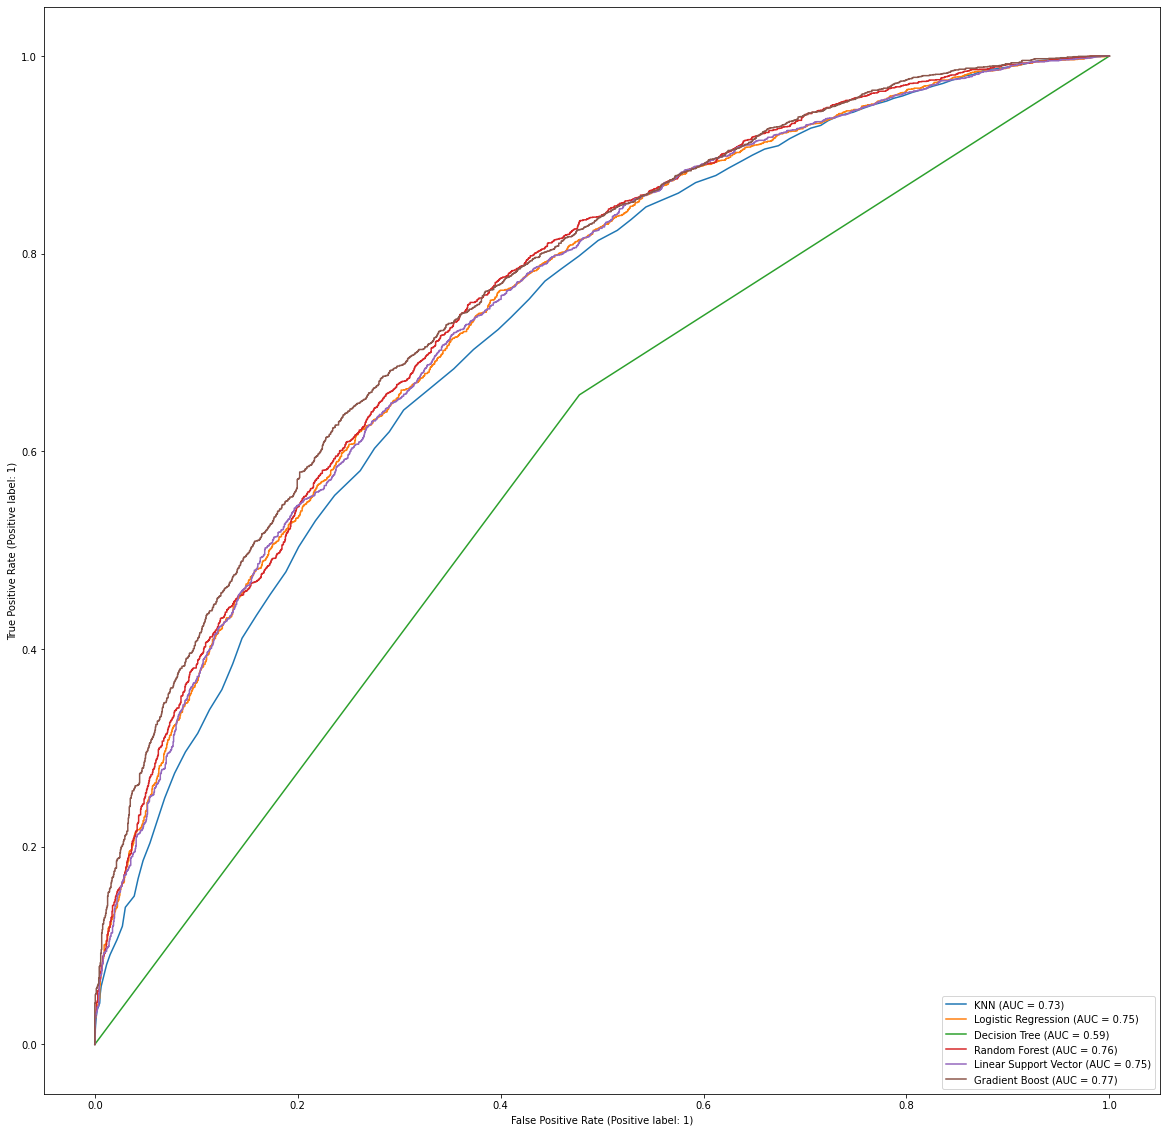

In [12]:
results = []
fig, ax = plt.subplots(figsize=(20,20))
for model in best_models:
    scores, display = calc_scores(model['model'], X_test, y_test, model['name'])
    results.append(scores)

In [13]:
model_scores = pd.DataFrame(results, columns = colnames).set_index("Model")

In [14]:
model_scores

,Brier Score,F1 Score,Recall,Precision,ROC_AUC
Model,,,,,
KNN,0.204749,0.759711,0.847260,0.688561,0.728580
Logistic Regression,0.198255,0.753787,0.801027,0.711808,0.747962
Decision Tree,0.398594,0.659110,0.657192,0.661040,0.589761
Random Forest,0.195874,0.765405,0.838014,0.704375,0.755605
Linear Support Vector,0.198282,0.752395,0.793493,0.715344,0.747847
Gradient Boost,0.192160,0.757820,0.804795,0.716027,0.765290


In [15]:
def conf_matrix(model,X_test,y_test,estimator_name):
    proba = model.predict_proba(X_test)
    preds = model.predict(X_test)
    pos_proba = proba[:,1]
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(estimator_name)
    plt.show()


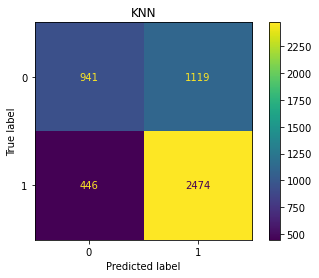

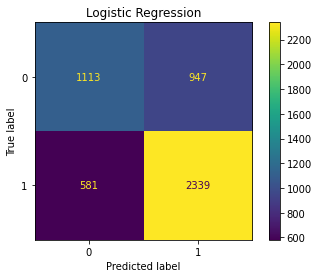

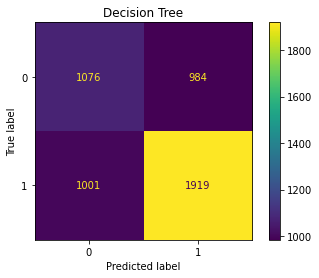

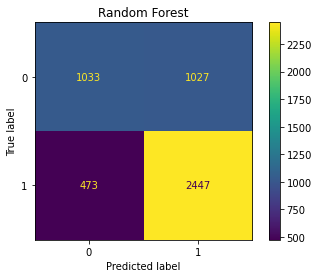

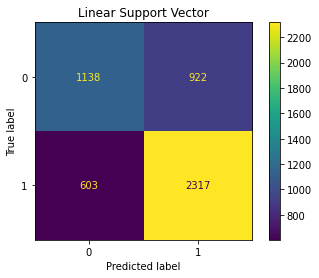

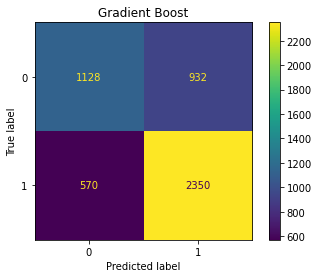

In [16]:

for model in best_models:
    conf_matrix(model['model'], X_test, y_test, model['name'])



In [17]:

for model in cv_models:
    df = pd.DataFrame.from_dict(model['model'].best_params_, orient='index', columns=['value'])
    print(df)

                      value
knn__metric       minkowski
knn__n_neighbors        125
                     value
lr__C                  0.1
lr__l1_ratio      0.736842
lr__max_iter          5000
lr__penalty     elasticnet
lr__solver            saga
lr__warm_start        True
                 value
dt__criterion  entropy
dt__splitter      best
                 value
rf__criterion  entropy
rf__max_depth       15
                    value
sgd__alpha           0.01
sgd__l1_ratio           0
sgd__loss             log
sgd__penalty   elasticnet
                                 value
xgb__booster                    gbtree
xgb__eta                          0.01
xgb__eval_metric                   auc
xgb__max_delta_step                  1
xgb__max_depth                       6
xgb__min_child_weight                1
xgb__n_estimators                 1000
xgb__objective         binary:logistic
xgb__random_state                   42
xgb__subsample                    0.75
xgb__tree_method              

In [18]:
best_models2 = {
model_dt_auc_best: 'Decision Tree',
# model_dt_auc_ksel_best:'DT AUC KSEL',
# model_dt_bs_best:'DT BS',
model_knn_auc_best:'KNN',
# model_knn_auc_ksel_best:'KNN AUC KSEL',
# model_knn_bs_best:'KNN BS',
model_lr_auc_best:'Logistic Regression',
# model_lr_auc_ksel_best:'LR AUC OH',
# model_lr_bs_best:'LR BS',
model_rf_auc_best:'Random Forest',
# model_rf_auc_ksel_best:'RF AUC KSEL',
# model_rf_bs_best:'RF BS',
model_sgd_auc_best:'Linear SVM',
# model_sgd_auc_ksel_best:'SGD AUC KSEL',
# model_sgd_bs_best:'SGD BS',
model_xgb_auc_best:'Gradient Boost',
# model_xgb_auc_ksel_best:'XGB AUC KSEL',
# model_xgb_bs_best:'XGB BS'
 }

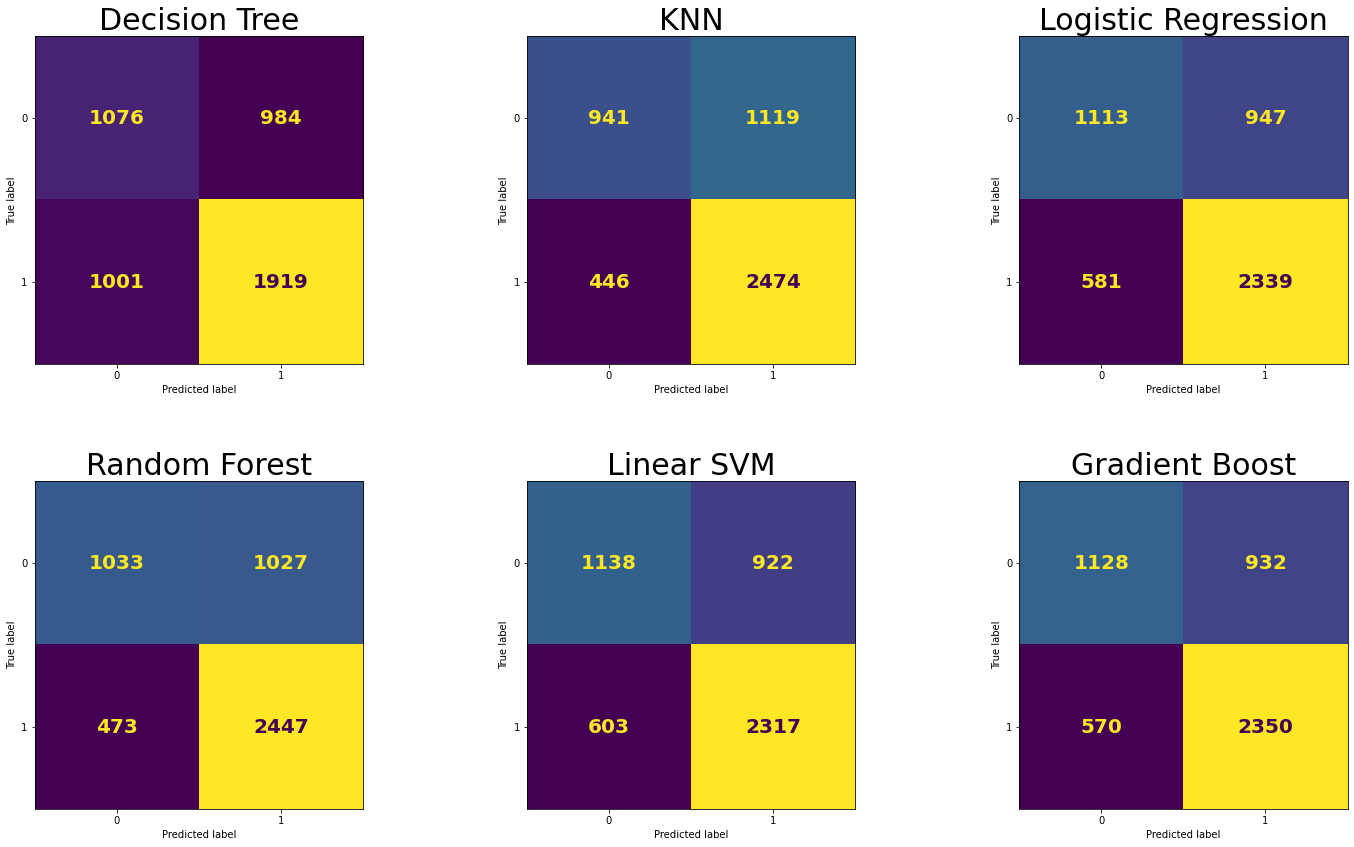

In [19]:
from math import floor
import matplotlib
f, axes = plt.subplots(2, 3, figsize=(25, 15))
font = {
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
for i, (model, name) in enumerate(best_models2.items()):
    j = floor((i/6)*2)
    k = i - 3*j
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[j,k])
    disp.ax_.set_title(name, fontsize=30)
    disp.im_.colorbar.remove()
# f.tight_layout()




In [20]:
for i, (model, name) in enumerate(best_models2.items()):
  print(i)

0
1
2
3
4
5


In [21]:
feature_importances = model_xgb_auc_best['xgb'].feature_importances_

In [22]:
import sklearn
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [23]:
cols = get_feature_names(model_xgb_auc_best['columnTransformer'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Transformer ordinal (type OrdinalEncoder) does not provide get_feature_names. Will return input column names if available
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


In [24]:
pd.DataFrame(feature_importances, index= cols, columns=['importance'])

,importance
ordinal__Age_at_Release,0.026203
ordinal__Education_Level,0.011136
ordinal__Dependents,0.008758
ordinal__Prison_Years,0.014156
ordinal__Prior_Arrest_Episodes_Felony,0.020205
...,...
oneHot__x20_True,0.009388
oneHot__x21_Negative,0.018223
oneHot__x21_Positive,0.011722
oneHot__x21_Unknown,0.015378


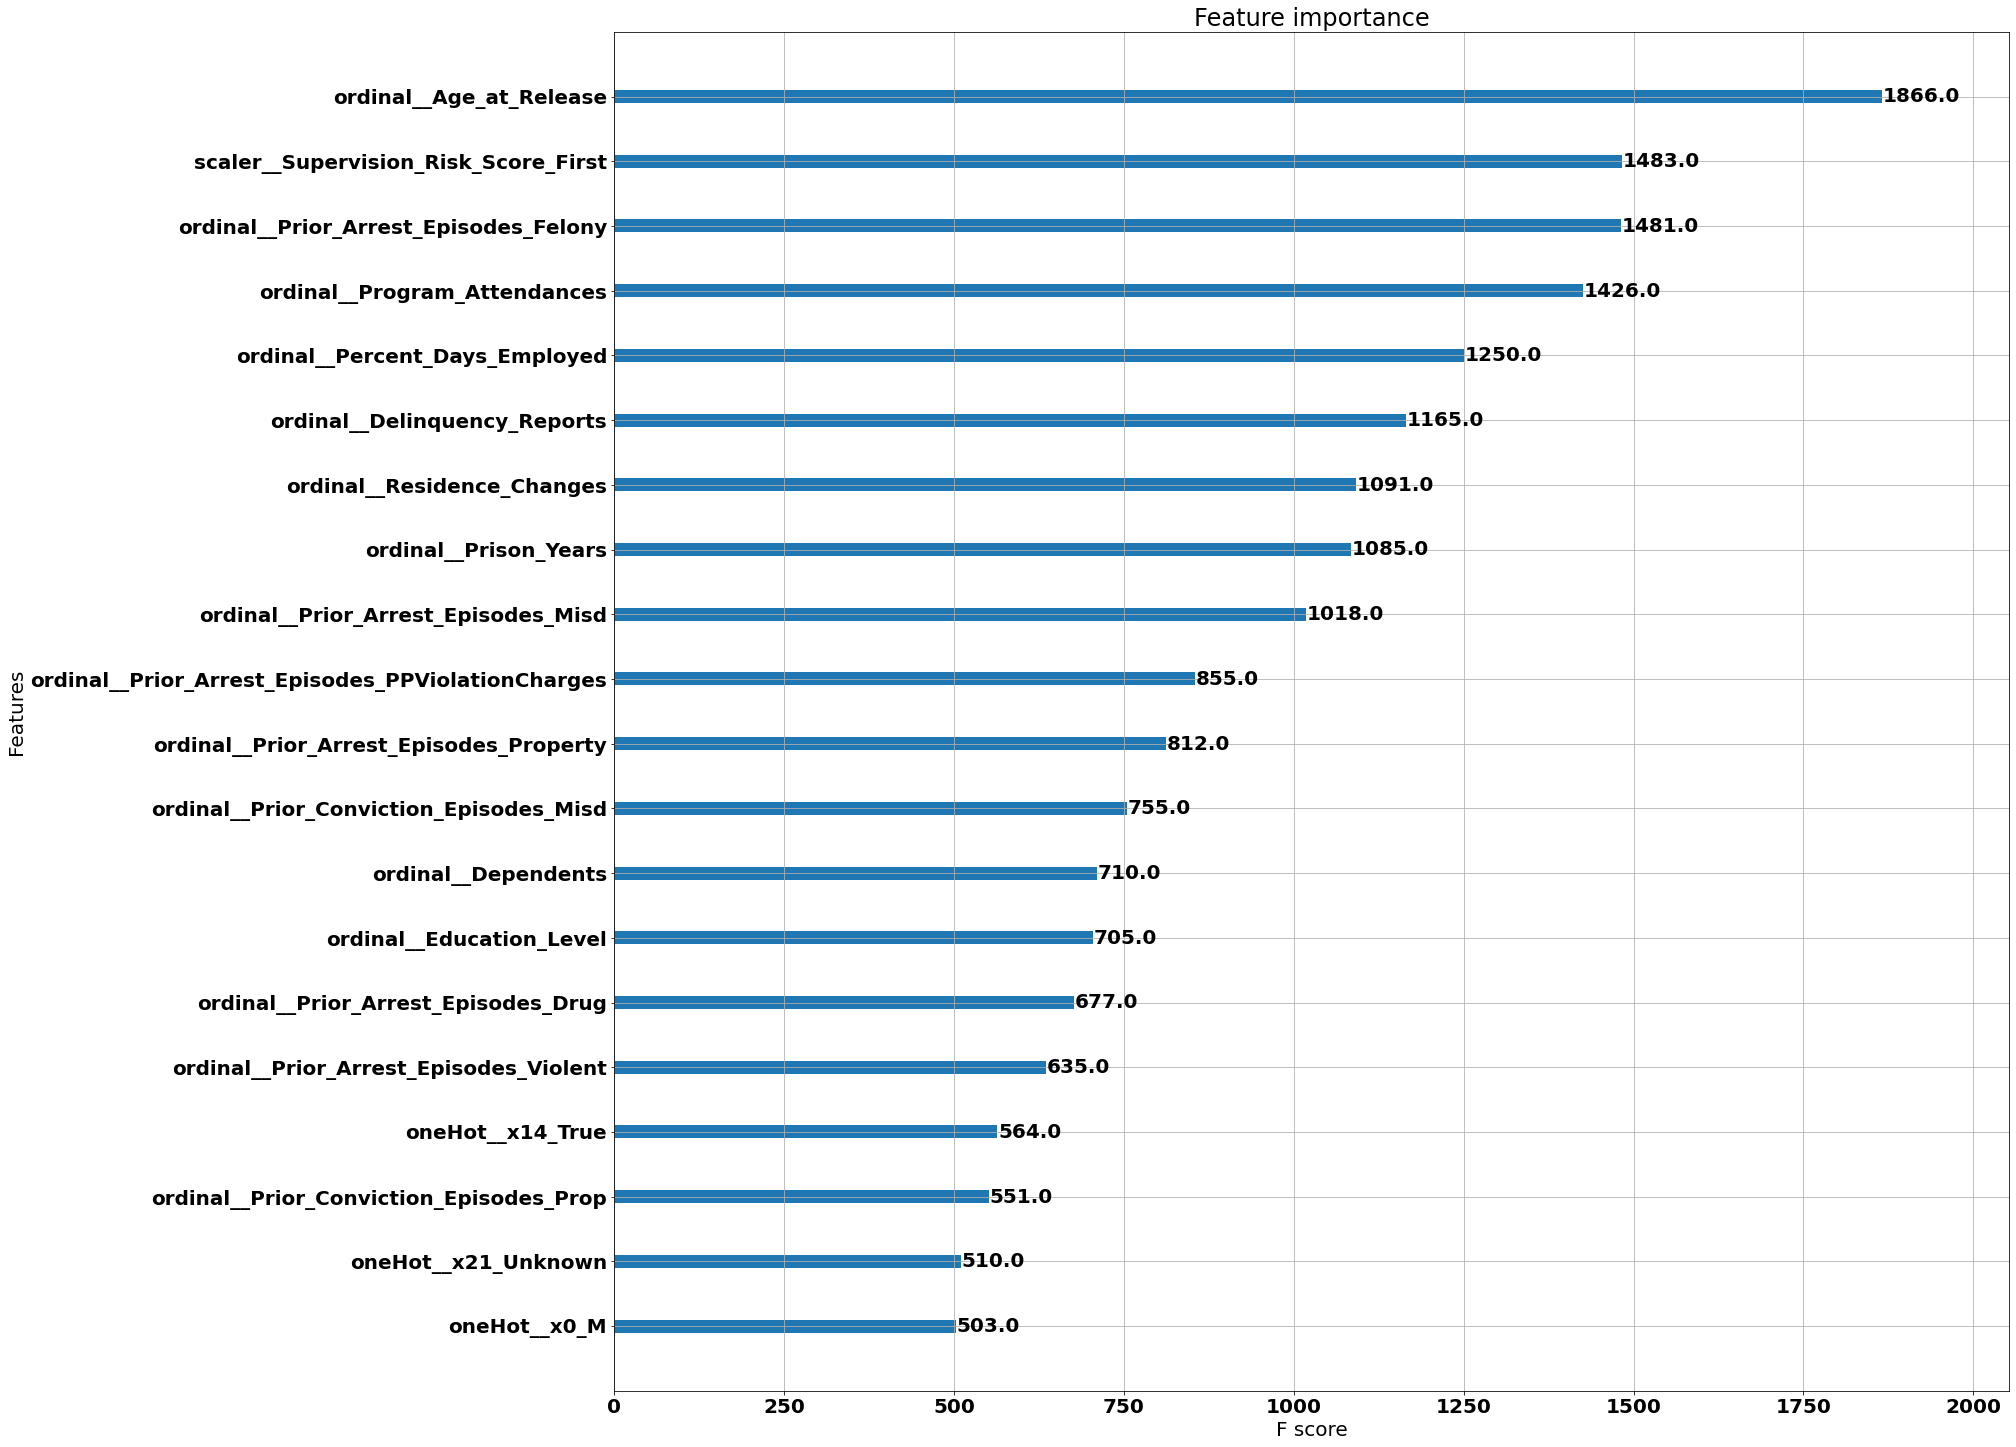

In [25]:
fig, ax = plt.subplots(figsize = (25,25))
model_xgb_auc_best['xgb'].get_booster().feature_names=cols
xgb.plot_importance(model_xgb_auc_best['xgb'].get_booster(), ax=ax, max_num_features=20)
plt.show()

In [26]:
model_xgb_auc_best['xgb'].get_booster().get_fscore()

{'oneHot__x0_M': 503.0,
 'oneHot__x10_True': 95.0,
 'oneHot__x11_True': 133.0,
 'oneHot__x12_True': 308.0,
 'oneHot__x13_True': 267.0,
 'oneHot__x14_True': 564.0,
 'oneHot__x15_True': 213.0,
 'oneHot__x16_True': 240.0,
 'oneHot__x17_True': 299.0,
 'oneHot__x18_True': 167.0,
 'oneHot__x19_True': 168.0,
 'oneHot__x1_WHITE': 453.0,
 'oneHot__x20_True': 260.0,
 'oneHot__x21_Negative': 389.0,
 'oneHot__x21_Positive': 142.0,
 'oneHot__x21_Unknown': 510.0,
 'oneHot__x2_1': 41.0,
 'oneHot__x2_10': 133.0,
 'oneHot__x2_11': 75.0,
 'oneHot__x2_12': 87.0,
 'oneHot__x2_13': 15.0,
 'oneHot__x2_14': 126.0,
 'oneHot__x2_15': 68.0,
 'oneHot__x2_16': 47.0,
 'oneHot__x2_17': 161.0,
 'oneHot__x2_18': 184.0,
 'oneHot__x2_19': 229.0,
 'oneHot__x2_2': 123.0,
 'oneHot__x2_20': 129.0,
 'oneHot__x2_21': 56.0,
 'oneHot__x2_22': 120.0,
 'oneHot__x2_23': 55.0,
 'oneHot__x2_24': 32.0,
 'oneHot__x2_25': 80.0,
 'oneHot__x2_3': 124.0,
 'oneHot__x2_4': 142.0,
 'oneHot__x2_5': 203.0,
 'oneHot__x2_6': 215.0,
 'oneHot__x2

In [32]:
model_xgb_auc.cv_results_['mean_test_score'][model_xgb_auc.best_index_]

0.7724359274329675

In [34]:
model_xgb_auc.cv_results_['std_test_score'][model_xgb_auc.best_index_]

0.01026788672396753